In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,birth_date,gender,bmi,child,smoking,region,insurance_price
0,2002,female,27.9,0,yes,southwest,16884.92
1,2003,male,33.8,1,no,southeast,1725.55
2,1993,male,33.0,3,no,southeast,4449.46
3,1988,male,22.7,0,no,northwest,21984.47
4,1989,male,28.9,0,no,northwest,3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
birth_date         1338 non-null int64
gender             1337 non-null object
bmi                1336 non-null float64
child              1338 non-null int64
smoking            1338 non-null object
region             1338 non-null object
insurance_price    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
df.isnull().sum()

birth_date         0
gender             1
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [5]:
df.describe()

,birth_date,bmi,child,insurance_price
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,1981.792975,30.680539,1.094918,13270.422414
std,14.049960,6.089223,1.205493,12110.011240
min,1957.000000,16.000000,0.000000,1121.870000
25%,1970.000000,26.300000,0.000000,4740.287500
50%,1982.000000,30.400000,1.000000,9382.030000
75%,1994.000000,34.700000,2.000000,16639.915000
max,2003.000000,53.100000,5.000000,63770.430000


In [7]:
from datetime import date

In [8]:
date.today()

datetime.date(2021, 10, 4)

In [9]:
date.today().year

2021

In [10]:
# we will change birth_date values to age
df["birth_date"] = date.today().year - df["birth_date"]
df.head()

,birth_date,gender,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [11]:
df.rename({"birth_date":"age"}, axis=1, inplace=True) # rename the birh_date column
df.head()

,age,gender,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
df.describe()

,age,bmi,child,insurance_price
count,1338.000000,1336.000000,1338.000000,1338.000000
mean,39.207025,30.680539,1.094918,13270.422414
std,14.049960,6.089223,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [13]:
df[["gender", "region", "smoking"]].describe() # non_numeric values' statistics

,gender,region,smoking
count,1337,1338,1338
unique,2,4,2
top,male,southeast,no
freq,675,364,1064


In [14]:
df.isnull().sum()

age                0
gender             1
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [15]:
df[df["gender"].isnull()]

,age,gender,bmi,child,smoking,region,insurance_price
73,58,NaN,32.0,1,no,southeast,11946.63


In [16]:
df[(df["age"] > 55 ) & (df["age"] < 60 )]["gender"].value_counts()

female    52
male      49
Name: gender, dtype: int64

In [17]:
df.loc[df[df["gender"].isnull()].index, "gender"] = "male"

In [18]:
df["gender"].isnull().sum()

0

In [19]:
df.loc[73]

age                       58
gender                  male
bmi                       32
child                      1
smoking                   no
region             southeast
insurance_price      11946.6
Name: 73, dtype: object

In [20]:
df.isnull().sum()

age                0
gender             0
bmi                2
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

In [21]:
df.groupby("smoking")["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
smoking,,,,,,,,
no,1062.0,30.672128,6.031057,16.0,26.3,30.40,34.4,53.1
yes,274.0,30.713139,6.320840,17.2,26.1,30.45,35.2,52.6


In [22]:
df[df["bmi"].isnull()]

,age,gender,bmi,child,smoking,region,insurance_price
17,23,male,NaN,0,no,northeast,2395.17
28,23,male,NaN,1,no,northwest,2775.19


In [24]:
df[(df["age"]==23) & (df["smoking"]=="no") & (df["gender"]=="male")].sort_values(by="bmi")

,age,gender,bmi,child,smoking,region,insurance_price
1027,23,male,18.7,0,no,northwest,21595.38
1114,23,male,24.5,0,no,northeast,2396.10
804,23,male,26.5,0,no,southeast,1815.88
881,23,male,27.4,1,no,northwest,2789.06
479,23,male,32.6,0,no,southeast,1824.29
1092,23,male,32.7,3,no,southwest,3591.48
12,23,male,34.4,0,no,southwest,1826.84
761,23,male,35.2,1,no,southwest,2416.96
817,23,male,37.1,3,no,southwest,3597.60
358,23,male,41.9,0,no,southeast,1837.28


In [25]:
df[(df["age"]==23) & (df["smoking"]=="no") & (df["gender"]=="male")]["bmi"].describe()

count    11.000000
mean     32.854545
std       8.694523
min      18.700000
25%      26.950000
50%      32.700000
75%      36.150000
max      50.400000
Name: bmi, dtype: float64

In [26]:
mean = df[(df["age"]==23) & (df["smoking"]=="no") & (df["gender"]=="male")]["bmi"].mean()
mean

32.85454545454545

In [27]:
df["bmi"].fillna(mean, inplace=True)

In [28]:
df.loc[17]

age                       23
gender                  male
bmi                  32.8545
child                      0
smoking                   no
region             northeast
insurance_price      2395.17
Name: 17, dtype: object

In [29]:
df.isnull().sum()

age                0
gender             0
bmi                0
child              0
smoking            0
region             0
insurance_price    0
dtype: int64

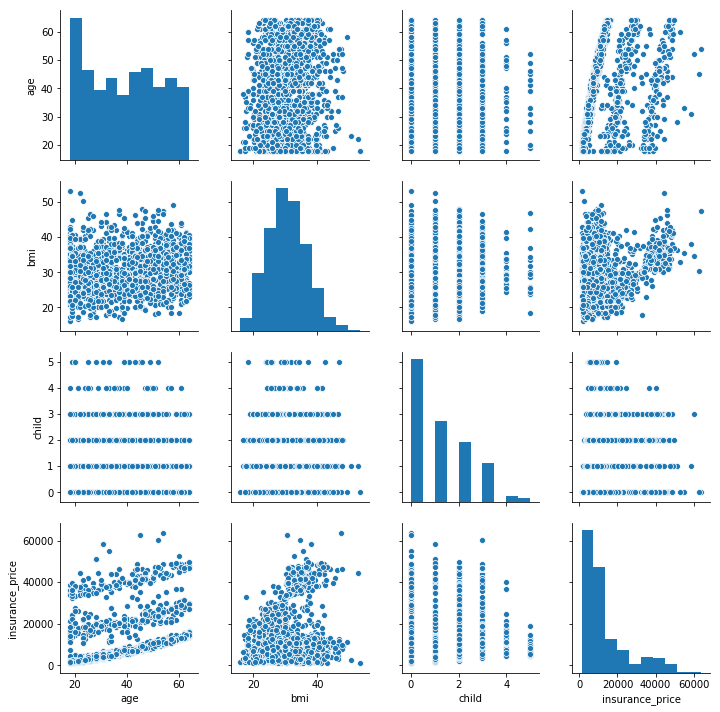

In [30]:
sns.pairplot(df)

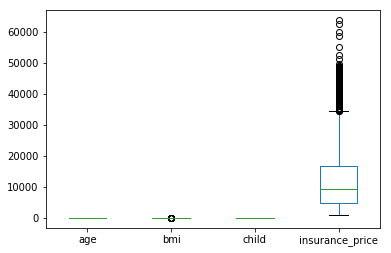

In [31]:
df.plot(kind="box")

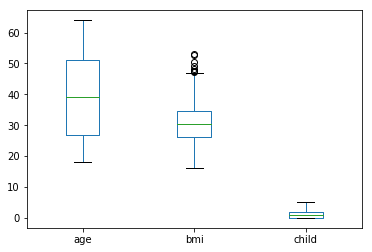

In [32]:
df.drop("insurance_price", axis=1).plot(kind="box")

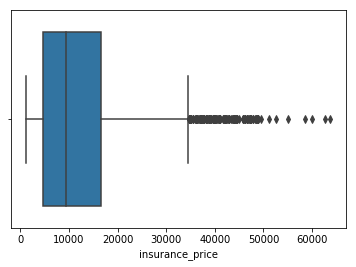

In [33]:
sns.boxplot(df["insurance_price"])

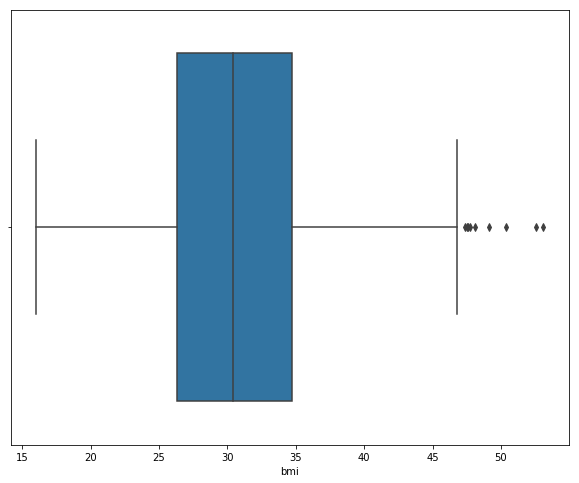

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot(df["bmi"])

In [35]:
df["bmi"].describe()

count    1338.000000
mean       30.683789
std         6.085247
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

### Tukey Rule

In [36]:
q1 = df["bmi"].quantile(.25)
q1

26.3

In [37]:
q3 = df["bmi"].quantile(.75)
q3

34.7

In [38]:
iqr = q3 - q1
iqr

8.400000000000002

In [39]:
ub = df["bmi"].quantile(.75) + 1.5 * iqr
ub

47.300000000000004

In [40]:
lb = df["bmi"].quantile(.25) - 1.5 * iqr
lb

13.699999999999998

In [41]:
outliers_low = df["bmi"] < lb

In [42]:
outliers_up = df["bmi"] > ub

In [43]:
df["bmi"][outliers_low] # there no low outlier smaller than lb

Series([], Name: bmi, dtype: float64)

In [44]:
df["bmi"][outliers_up]

116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64

In [45]:
len(df["bmi"]) - (len(df["bmi"][outliers_low]) + len(df["bmi"][outliers_up]))

1329

In [47]:
df["bmi"][outliers_low | outliers_up] #actually we don't need to write "outliers_low" because it's empty

116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64

In [48]:
df["bmi"][~(outliers_low | outliers_up)]

0       27.900000
1       33.800000
2       33.000000
3       22.700000
4       28.900000
5       25.700000
6       33.400000
7       27.700000
8       29.800000
9       25.800000
10      26.200000
11      26.300000
12      34.400000
13      39.800000
14      42.100000
15      24.600000
16      30.800000
17      32.854545
18      40.300000
19      35.300000
20      36.000000
21      32.400000
22      34.100000
23      31.900000
24      28.000000
25      27.700000
26      23.100000
27      32.800000
28      32.854545
29      36.300000
          ...    
1307    28.100000
1308    30.200000
1309    32.200000
1310    26.300000
1311    26.700000
1312    42.900000
1313    34.700000
1314    23.700000
1315    28.300000
1316    20.600000
1318    39.700000
1319    26.300000
1320    31.100000
1321    26.700000
1322    38.800000
1323    40.400000
1324    25.900000
1325    33.500000
1326    32.900000
1327    30.000000
1328    24.200000
1329    38.600000
1330    25.700000
1331    33.400000
1332    44

In [49]:
df = df[~(outliers_low | outliers_up)]

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1337
Data columns (total 7 columns):
age                1329 non-null int64
gender             1329 non-null object
bmi                1329 non-null float64
child              1329 non-null int64
smoking            1329 non-null object
region             1329 non-null object
insurance_price    1329 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.1+ KB


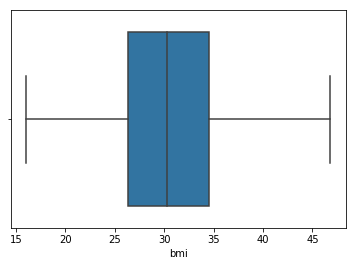

In [52]:
sns.boxplot(df["bmi"]) # now there is no outlier

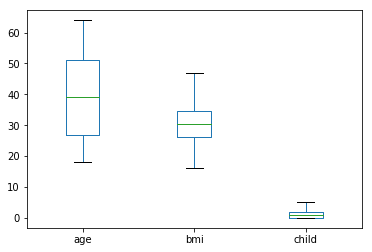

In [53]:
df.drop("insurance_price", axis=1).plot(kind="box")

### Visualization

In [54]:
df.groupby("smoking").mean()

,age,bmi,child,insurance_price
smoking,,,,
no,39.378072,30.570519,1.091682,8442.167316
yes,38.523985,30.508487,1.114391,31835.343985


In [55]:
df.groupby("gender").mean()

,age,bmi,child,insurance_price
gender,,,,
female,39.474962,30.300910,1.072838,12445.742580
male,38.937313,30.810611,1.119403,13966.338627


In [56]:
df.groupby("region").mean()

,age,bmi,child,insurance_price
region,,,,
northeast,39.247678,29.145680,1.043344,13418.686409
northwest,39.196923,29.249399,1.147692,12417.575169
southeast,38.935574,33.039216,1.058824,14629.138067
southwest,39.462963,30.544136,1.138889,12242.720093


In [57]:
df.groupby("smoking").describe().T

smoking                          no           yes
age             count   1058.000000    271.000000
                mean      39.378072     38.523985
                std       14.078600     13.932057
                min       18.000000     18.000000
                25%       27.000000     27.000000
                50%       40.000000     38.000000
                75%       52.000000     49.000000
                max       64.000000     64.000000
bmi             count   1058.000000    271.000000
                mean      30.570519     30.508487
                std        5.874950      6.040962
                min       16.000000     17.200000
                25%       26.300000     26.050000
                50%       30.300000     30.400000
                75%       34.375000     35.050000
                max       46.800000     46.200000
child           count   1058.000000    271.000000
                mean       1.091682      1.114391
                std        1.220337      1.160226
                min        0.000000      0.000000
                25%        0.000000      0.000000
                50%        1.000000      1.000000
                75%        2.000000      2.000000
                max        5.000000      5.000000
insurance_price count   1058.000000    271.000000
                mean    8442.167316  31835.343985
                std     6002.861386  11384.541944
                min     1121.870000  12829.460000
                25%     3988.407500  20759.810000
                50%     7341.415000  34303.170000
                75%    11363.150000  40936.860000
                max    36910.610000  62592.870000

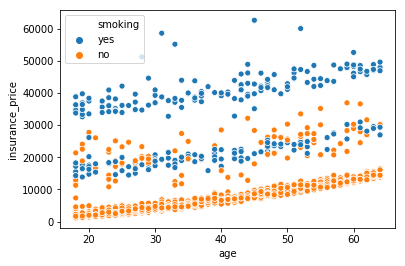

In [58]:
sns.scatterplot("age", "insurance_price", data=df, hue="smoking")

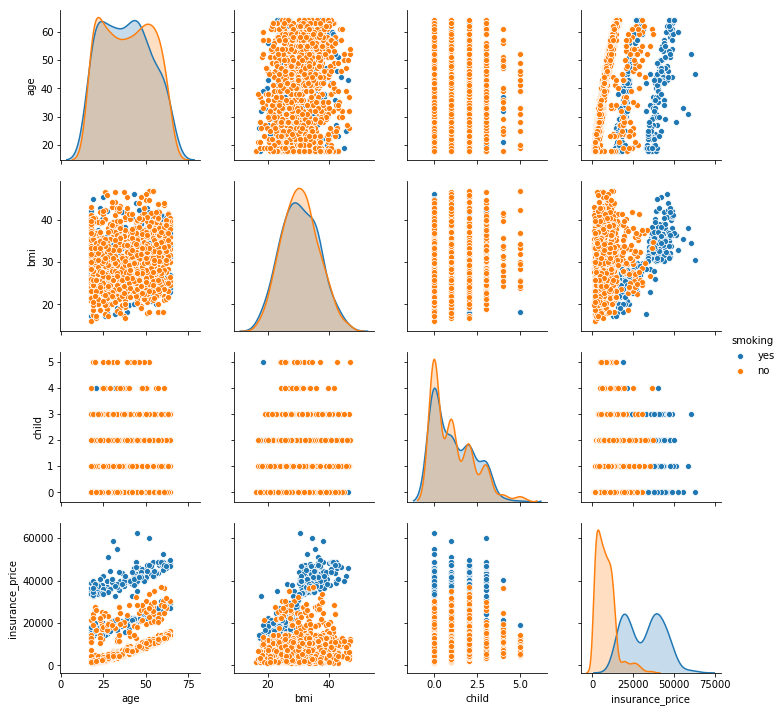

In [59]:
sns.pairplot(df, hue="smoking")

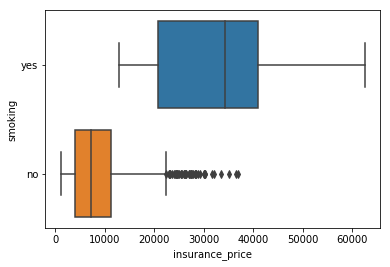

In [60]:
sns.boxplot(x="insurance_price", y="smoking", data=df)

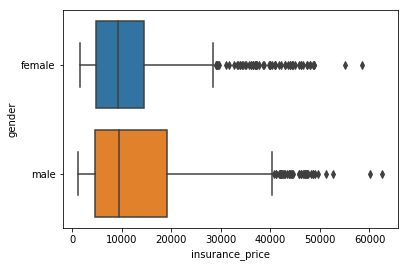

In [61]:
sns.boxplot(x="insurance_price", y="gender", data= df)

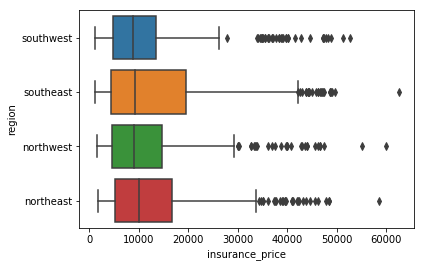

In [62]:
sns.boxplot(x="insurance_price", y="region", data=df)

In [63]:
df["region"].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

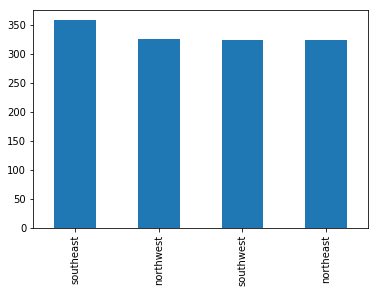

In [64]:
df["region"].value_counts().plot(kind="bar")

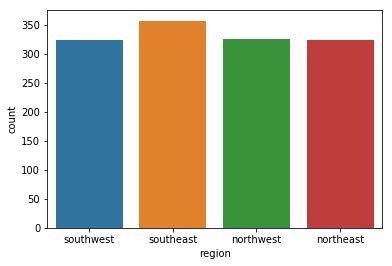

In [65]:
sns.countplot(df["region"])

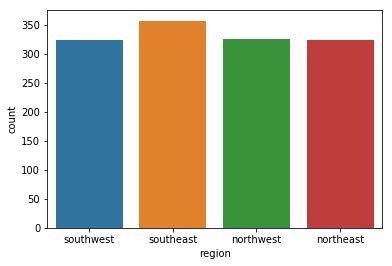

In [66]:
# sns.set(style="darkgrid")
# titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="region", data=df)

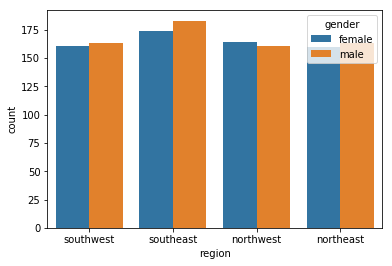

In [67]:
ax = sns.countplot(x="region", hue="gender", data=df)

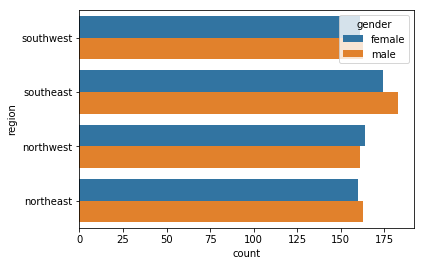

In [68]:
ax = sns.countplot(y="region", hue="gender", data=df)

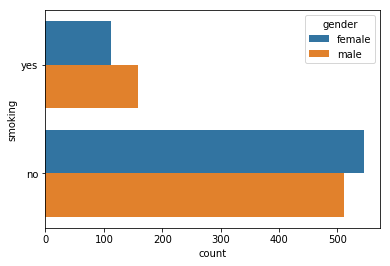

In [69]:
ax = sns.countplot(y="smoking", hue="gender", data=df)

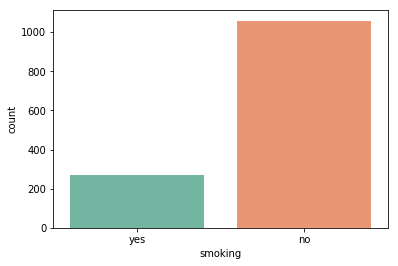

In [70]:
# Use a different color palette:

ax = sns.countplot(x="smoking", data=df, palette="Set2")

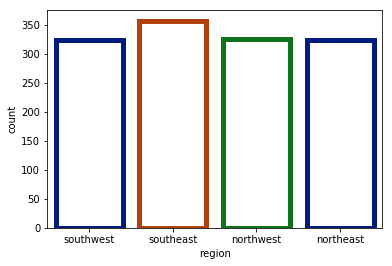

In [71]:
#Use ``plt.bar`` keyword arguments for a different look:

ax = sns.countplot(x="region", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

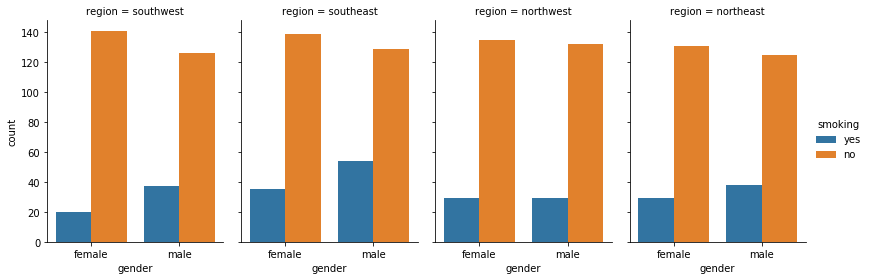

In [194]:
g = sns.catplot(x="gender", hue="smoking", col="region",
                data=df, kind="count",
                height=4, aspect=.7);

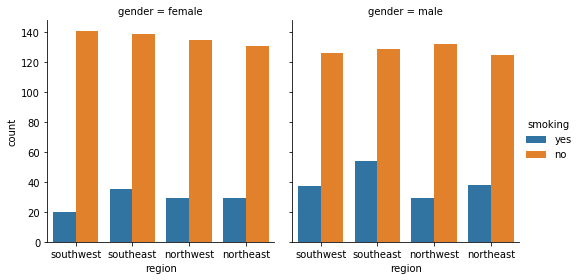

In [77]:
g = sns.catplot(x="region", hue="smoking", col="gender",
                data=df, kind="count",
                height=4, aspect=.9);

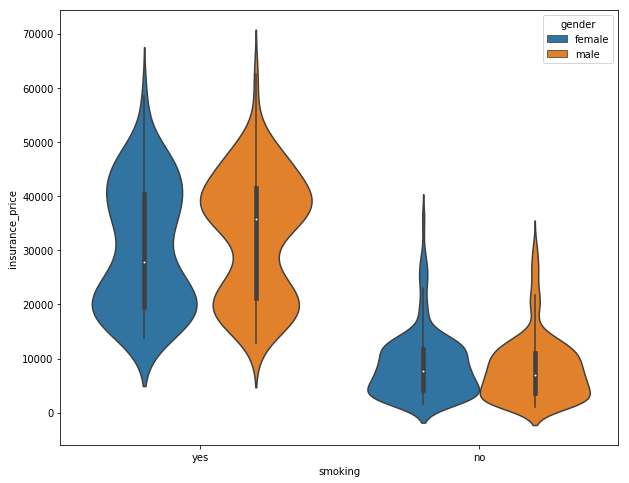

In [78]:
plt.figure(figsize=(10,8))
sns.violinplot(x="smoking", y= "insurance_price", hue="gender", data=df)

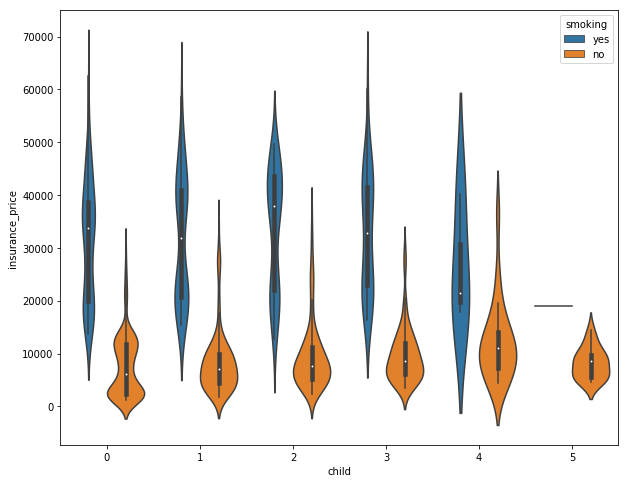

In [79]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='child', y='insurance_price', hue='smoking', data=df)

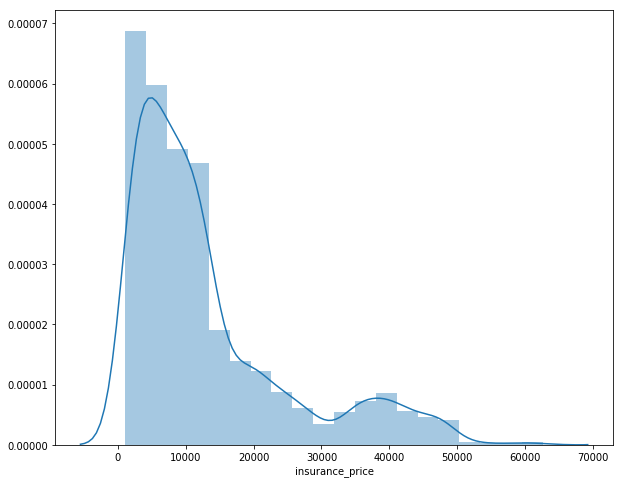

In [80]:
plt.figure(figsize=(10,8))
sns.distplot(df["insurance_price"], bins=20)

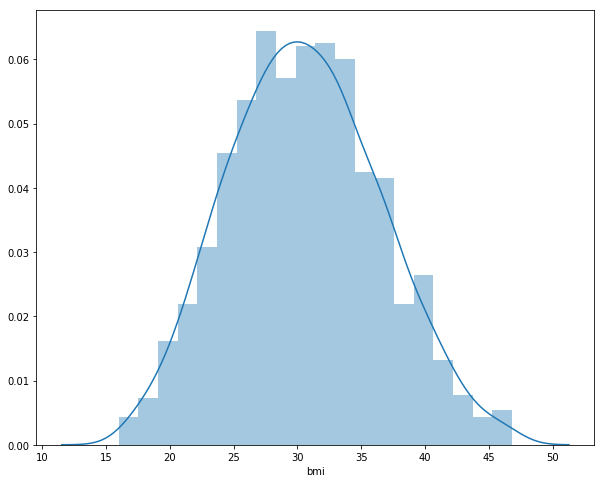

In [81]:
plt.figure(figsize=(10,8))
sns.distplot(df["bmi"], bins=20)

### Encoding

In [82]:
df.head()

,age,gender,bmi,child,smoking,region,insurance_price
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [86]:
pd.get_dummies(data=df, drop_first=True)

,age,bmi,child,insurance_price,gender_male,smoking_yes,region_northwest,region_southeast,region_southwest
0,19,27.900000,0,16884.92,0,1,0,0,1
1,18,33.800000,1,1725.55,1,0,0,1,0
2,28,33.000000,3,4449.46,1,0,0,1,0
3,33,22.700000,0,21984.47,1,0,1,0,0
4,32,28.900000,0,3866.86,1,0,1,0,0
5,31,25.700000,0,3756.62,0,0,0,1,0
6,46,33.400000,1,8240.59,0,0,0,1,0
7,37,27.700000,3,7281.51,0,0,1,0,0
8,37,29.800000,2,6406.41,1,0,0,0,0
9,60,25.800000,0,28923.14,0,0,1,0,0


In [88]:
df = pd.get_dummies(data=df, drop_first=True)

In [89]:
df.corr()

,age,bmi,child,insurance_price,gender_male,smoking_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.111409,0.043041,0.302022,-0.019143,-0.024505,-0.000283,-0.011581,0.010474
bmi,0.111409,1.000000,0.016067,0.191119,0.043159,-0.004233,-0.126078,0.254677,-0.001321
child,0.043041,0.016067,1.000000,0.069739,0.019281,0.007577,0.024209,-0.018816,0.020021
insurance_price,0.302022,0.191119,0.069739,1.000000,0.063394,0.785912,-0.037704,0.071597,-0.045906
gender_male,-0.019143,0.043159,0.019281,0.063394,1.000000,0.079854,-0.009961,0.010263,-0.001195
smoking_yes,-0.024505,-0.004233,0.007577,0.785912,0.079854,1.000000,-0.035940,0.068270,-0.039440
region_northwest,-0.000283,-0.126078,0.024209,-0.037704,-0.009961,-0.035940,1.000000,-0.344807,-0.323046
region_southeast,-0.011581,0.254677,-0.018816,0.071597,0.010263,0.068270,-0.344807,1.000000,-0.344105
region_southwest,0.010474,-0.001321,0.020021,-0.045906,-0.001195,-0.039440,-0.323046,-0.344105,1.000000


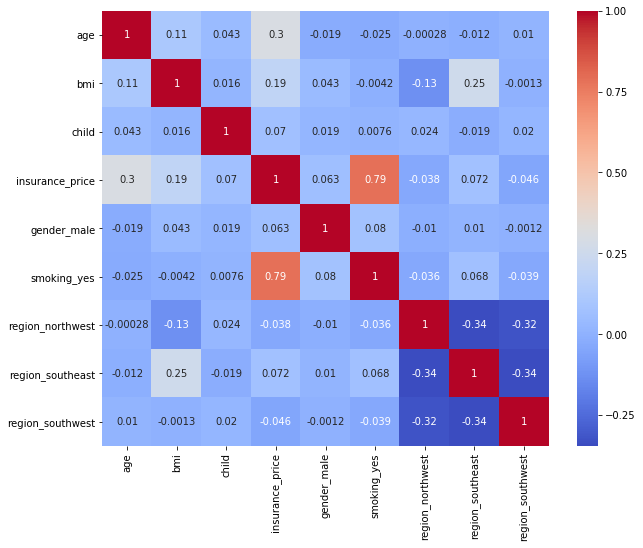

In [93]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")